# Variational Autoencoder 

In [1]:
import warnings,os
import numpy as np
import tensorflow as tf
import tensorflow.contrib.slim as slim # I lkie slim 
import matplotlib.pyplot as plt
# warnings.filterwarnings("ignore") # Stop showing annoying warnings
tf.logging.set_verbosity(tf.logging.ERROR) # I like old-style MNIST w/o warnings
from tensorflow.examples.tutorials.mnist import input_data
from util import gpu_sess
from vae_class import vae_class
%matplotlib inline
print ("TF version is [%s]."%(tf.__version__))

TF version is [1.8.0].


## Train Vanilla VAE (no conditioning, no weighting)

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
[0000/20000][0.0%] Loss: 183.11(recon:147.60+kl:35.49+l2:0.02)


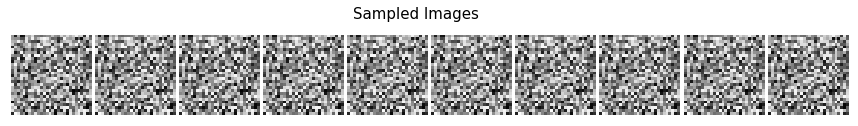

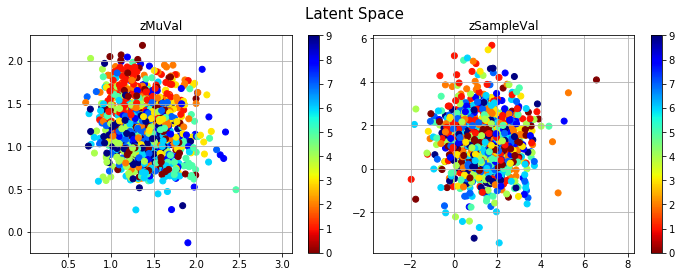

[10000/20000][50.0%] Loss: 30.09(recon:27.38+kl:2.67+l2:0.04)


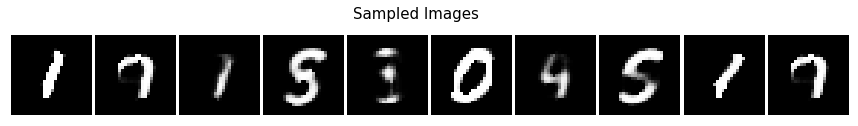

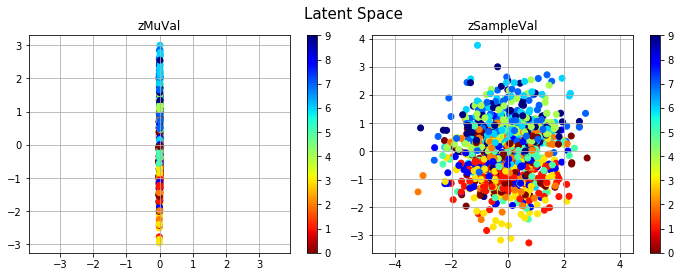

[19999/20000][100.0%] Loss: 29.34(recon:26.09+kl:3.17+l2:0.08)


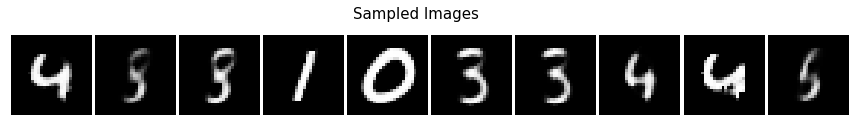

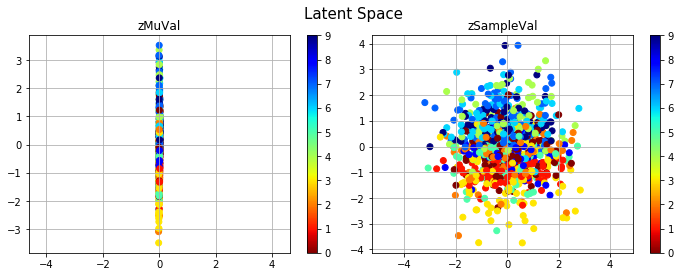

Done


In [2]:
tf.reset_default_graph() # Reset Graph 
tf.set_random_seed(0); np.random.seed(0) # Fix random seed 
V = vae_class(_name='VAE',_xDim=784,_zDim=16,_hDims=[256,128],_cDim=0, 
              _actv=tf.nn.softplus,_bn=None,
              _optimizer=tf.train.AdamOptimizer,
              _optm_param={'lr':0.001,'beta1':0.9,'beta2':0.9,'epsilon':1e-8},
              _VERBOSE=False)
sess = gpu_sess()
# We will use MNIST
mnist = input_data.read_data_sets('data', one_hot=True)
X = mnist.train.images
Y = mnist.train.labels
# Train Vanialla VAE
V.train(_sess=sess,_X=X,_Y=Y,_C=None,_Q=None,_maxIter=2e4,_batchSize=256,_PRINT_EVERY=1e4,_PLOT_EVERY=1e4,
       _imgSz=(28,28),_figsize=(15,2),_nR=1,_nC=10,_LR_SCHEDULE=False)
print ("Done")

Test and save weights

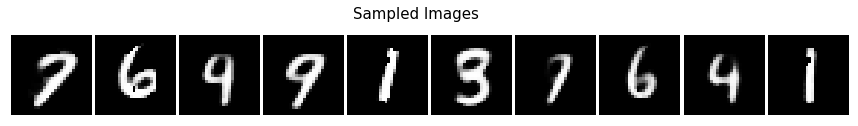

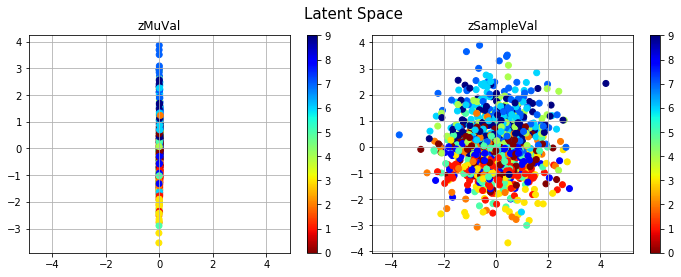

[nets/net_VAE.npz] Saved. Size is [8.3740]MB


In [3]:
V.test(_sess=sess,_nR=1,_nC=10,_C=None,_X=X,_Y=Y,_imgSz=(28,28),_figsize=(15,2))
V.save(_sess=sess,_VERBOSE=True)

Initialize weights and test

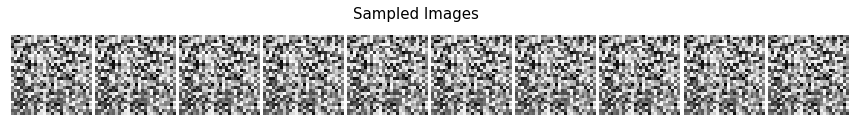

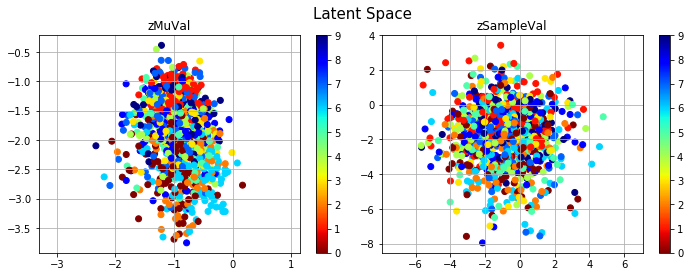

In [4]:
tf.reset_default_graph() # Reset Graph 
V2 = vae_class(_name='VAE',_xDim=784,_zDim=16,_hDims=[256,128],_cDim=0, 
              _actv=tf.nn.softplus,_bn=None,
              _optimizer=tf.train.AdamOptimizer,
              _optm_param={'lr':0.0001,'beta1':0.9,'beta2':0.9,'epsilon':1e-8},
              _VERBOSE=False)
sess = gpu_sess() # New session 
sess.run(tf.global_variables_initializer())
V2.test(_sess=sess,_nR=1,_nC=10,_C=None,_X=X,_Y=Y,_imgSz=(28,28),_figsize=(15,2))

Restore weights and test

Weight restored from [nets/net_VAE.npz] Size is [8.3740]MB


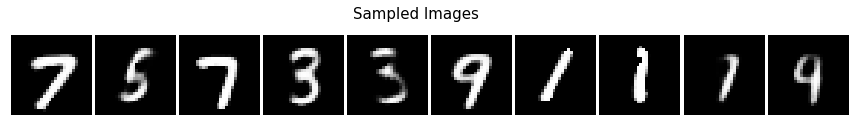

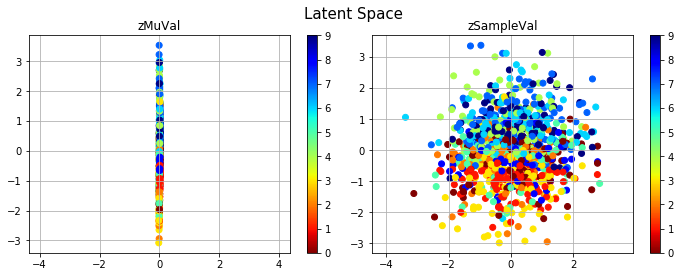

In [5]:
V2.restore(_sess=sess,_VERBOSE=True)
V2.test(_sess=sess,_nR=1,_nC=10,_C=None,_X=X,_Y=Y,_imgSz=(28,28),_figsize=(15,2))

## Train Conditional VAE (no weighting) 

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
[0000/20000][0.0%] Loss: 455.59(recon:143.85+kl:311.72+l2:0.03)


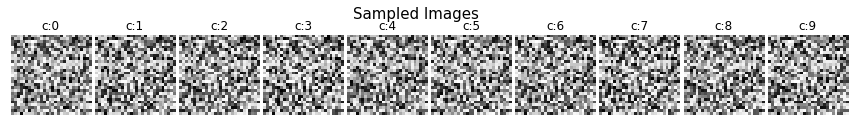

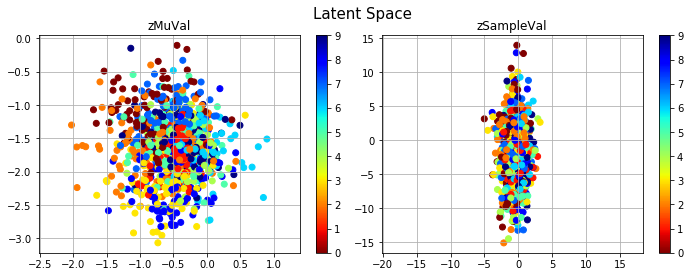

[10000/20000][50.0%] Loss: 28.10(recon:26.32+kl:1.76+l2:0.02)


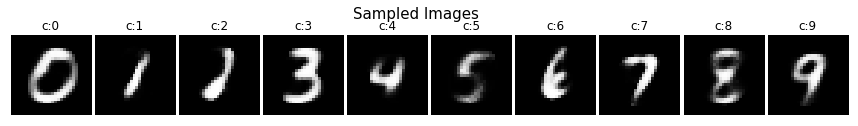

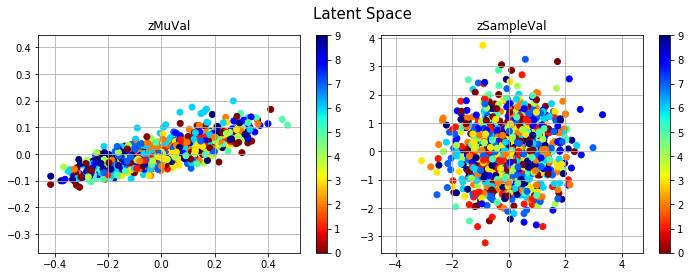

[19999/20000][100.0%] Loss: 27.48(recon:24.95+kl:2.51+l2:0.03)


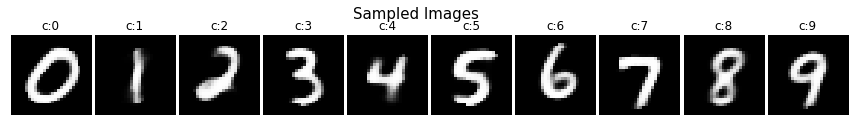

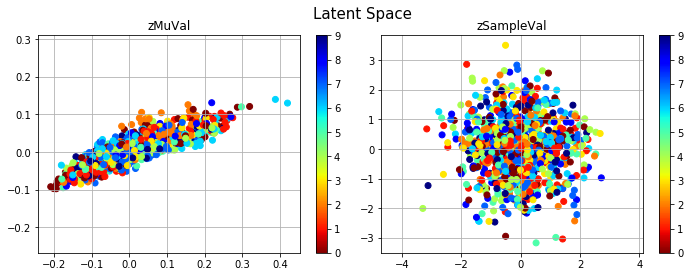

In [6]:
tf.reset_default_graph() # Reset Graph 
tf.set_random_seed(0); np.random.seed(0) # Fix random seed 
CV = vae_class(_name='CVAE',_xDim=784,_zDim=128,_hDims=[256,128],_cDim=10, 
              _actv=tf.nn.softplus,_bn=None,
              _optimizer=tf.train.AdamOptimizer,
              _optm_param={'lr':0.0001,'beta1':0.9,'beta2':0.9,'epsilon':1e-8},
              _VERBOSE=False)
sess = gpu_sess()
# We will use MNIST
mnist = input_data.read_data_sets('data', one_hot=True)
X = mnist.train.images
Y = mnist.train.labels
# Train Conditional VAE
CV.train(_sess=sess,_X=X,_Y=Y,_C=Y,_Q=None,_maxIter=2e4,_batchSize=256,_PRINT_EVERY=1e4,_PLOT_EVERY=1e4,
       _imgSz=(28,28),_figsize=(15,2),_nR=1,_nC=10,_LR_SCHEDULE=False)

## Train Conditional VAE with weighting Q
#### More weights to 0 than 4 and 5 than 9
 0,1,2,3,4 => 2,1,0,-1,-2
 
 5,6,7,8,9 => 2,1,0,-1,-2

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
[0000/20000][0.0%] Loss: 235.84(recon:73.48+kl:162.34+l2:0.03)


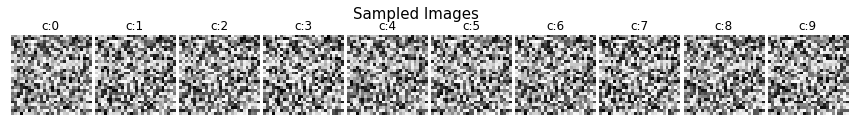

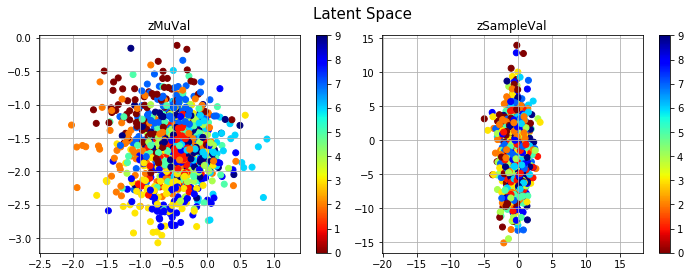

[10000/20000][50.0%] Loss: 10.49(recon:9.85+kl:0.62+l2:0.02)


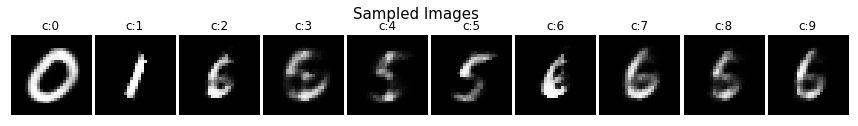

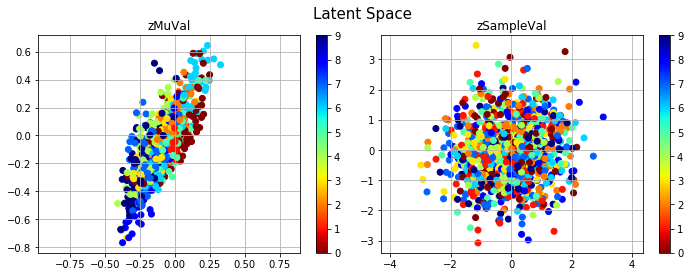

[19999/20000][100.0%] Loss: 9.29(recon:8.70+kl:0.57+l2:0.02)


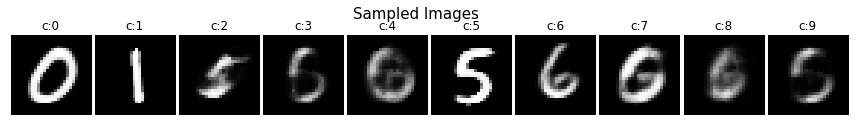

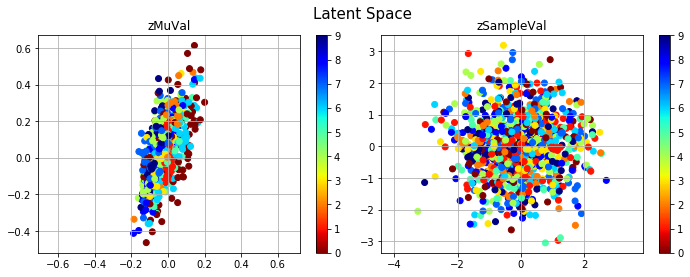

In [7]:
tf.reset_default_graph() # Reset Graph 
tf.set_random_seed(0); np.random.seed(0) # Fix random seed 
QV = vae_class(_name='QCVAE',_xDim=784,_zDim=128,_hDims=[256,128],_cDim=10, 
              _actv=tf.nn.softplus,_bn=None,
              _optimizer=tf.train.AdamOptimizer,
              _optm_param={'lr':0.0001,'beta1':0.9,'beta2':0.9,'epsilon':1e-8},
              _VERBOSE=False)
sess = gpu_sess()
# We will use MNIST
mnist = input_data.read_data_sets('data', one_hot=True)
X = mnist.train.images
Y = mnist.train.labels
Q = np.zeros(mnist.train.num_examples)
for i in range(mnist.train.num_examples):
    yVal = np.argmax(Y[i,:])
    if yVal<5: Q[i] = 2-yVal # 0,1,2,3,4 => 2,1,0,-1,-2
    else: Q[i] = 7-yVal # 5,6,7,8,9 => 2,1,0,-1,-2
# Train Conditional VAE with weighting
QV.train(_sess=sess,_X=X,_Y=Y,_C=Y,_Q=Q,_maxIter=2e4,_batchSize=256,_PRINT_EVERY=1e4,_PLOT_EVERY=1e4,
       _imgSz=(28,28),_figsize=(15,2),_nR=1,_nC=10,_LR_SCHEDULE=False)

## Train VAE with weighting Q
#### More weights to 0 than 4 and 5 than 9
 0,1,2,3,4 => 2,1,0,-1,-2
 
 5,6,7,8,9 => 2,1,0,-1,-2

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
[0000/20000][0.0%] Loss: 238.20(recon:75.83+kl:162.34+l2:0.03)


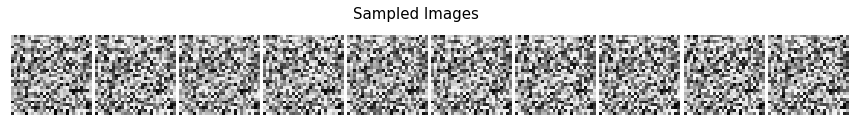

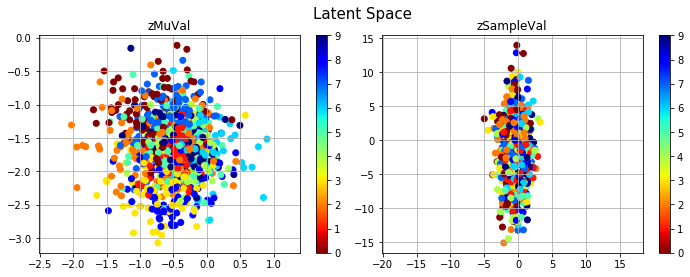

[10000/20000][50.0%] Loss: 12.49(recon:11.44+kl:1.04+l2:0.02)


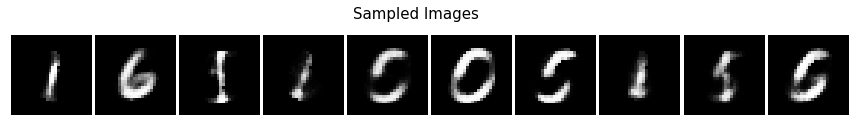

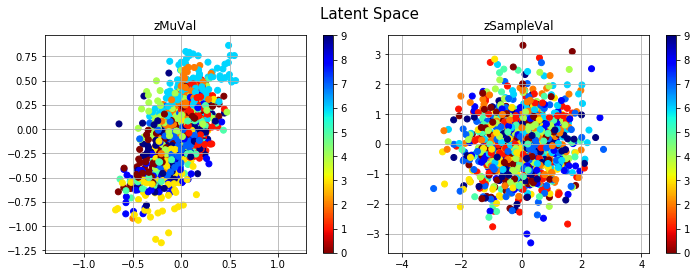

[19999/20000][100.0%] Loss: 10.47(recon:9.48+kl:0.97+l2:0.02)


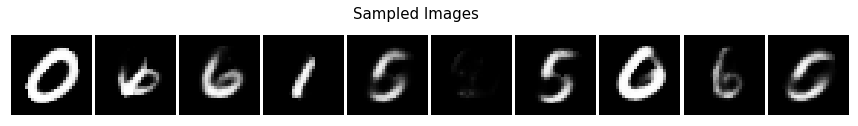

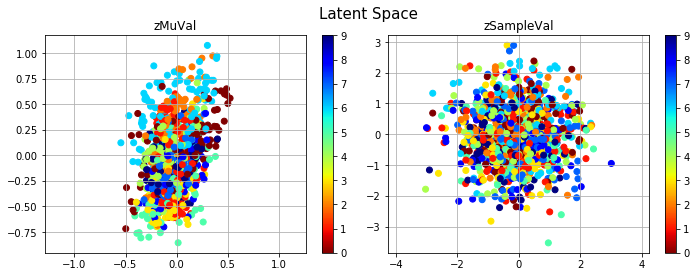

In [8]:
tf.reset_default_graph() # Reset Graph 
tf.set_random_seed(0); np.random.seed(0) # Fix random seed 
QV = vae_class(_name='QVAE',_xDim=784,_zDim=128,_hDims=[256,128],_cDim=0, 
              _actv=tf.nn.softplus,_bn=None,
              _optimizer=tf.train.AdamOptimizer,
              _optm_param={'lr':0.0001,'beta1':0.9,'beta2':0.9,'epsilon':1e-8},
              _VERBOSE=False)
sess = gpu_sess()
# We will use MNIST
mnist = input_data.read_data_sets('data', one_hot=True)
X = mnist.train.images
Y = mnist.train.labels
Q = np.zeros(mnist.train.num_examples)
for i in range(mnist.train.num_examples):
    yVal = np.argmax(Y[i,:])
    if yVal<5: Q[i] = 2-yVal # 0,1,2,3,4 => 2,1,0,-1,-2
    else: Q[i] = 7-yVal # 5,6,7,8,9 => 2,1,0,-1,-2
# Train Conditional VAE with weighting
QV.train(_sess=sess,_X=X,_Y=Y,_C=None,_Q=Q,_maxIter=2e4,_batchSize=256,_PRINT_EVERY=1e4,_PLOT_EVERY=1e4,
       _imgSz=(28,28),_figsize=(15,2),_nR=1,_nC=10,_LR_SCHEDULE=False)